In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
#plot settings
plt.style.use('seaborn')
plt.rc('font',size=14)
plt.rc('figure',titlesize=18)
plt.rc('axes',labelsize=15)
plt.rc('axes',titlesize=18)

In [3]:
#loding dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

x=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y=pd.DataFrame(diabetes.target)
#x = [Data]
#y = [response]


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
x.shape

(442, 10)

In [6]:
y.columns = ['Glucose']
y.head()

,Glucose
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [7]:
#reading the data summary
model = sm.OLS(y, sm.add_constant(x))
model_fit = model.fit()

print(model_fit.summary())
#The regression line expalin for 0.518 of the value
#the p value is less than the confidence level hence its a good model
#y = 152.1335+age*(-10.0122)+sex*(-239.8191)+bmi*(519.8398)+bp*(324.3904)+s1*(-792.1842)+s2*476.7458+s3*101.0446+s4*177.0642+s5*751.27+s6*67.62

C:\Users\Nikhil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           3.83e-62
Time:                        21:13:55   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [8]:
#seeing the whole data
#s1 stands for Total Cholesterol (TC)
#s2 stands for LDL cholesterol level in diabetes
#s3 stands for High-density lipoprotein
#s4 stands for tetrahydrocannabinol 
#s5 stands for serum concentration of lamorigine (LTG)
#s6 stands for blood serum glucose (GLU)
dataframe = pd.concat([x,y],axis=1)
dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Glucose
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [10]:
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [11]:
a = dataframe.columns[-1]
a

'Glucose'

Text(0, 0.5, 'Residuals')

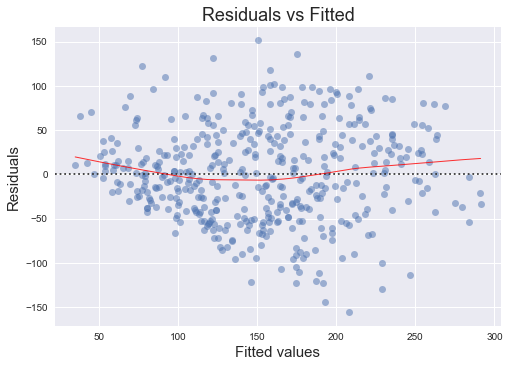

In [12]:
# Residuals vs Fitted values. 
# Plot should be random
# 
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

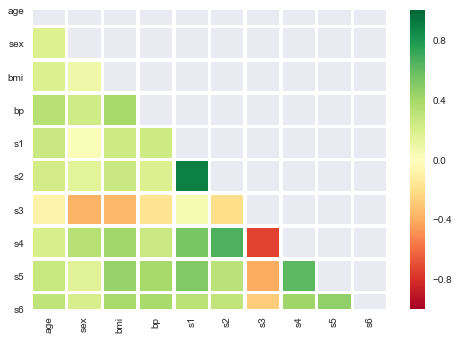

In [13]:
# Testing Multicollinearity 
# Draw a heatmap with correlation using pearson
import seaborn 
corr_df = x.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

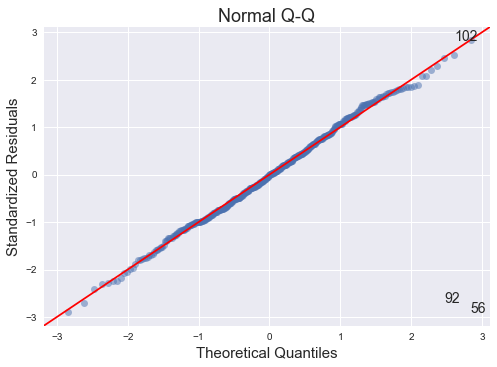

In [14]:
# Test normality 
# QQ Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [15]:
#The Q-Q plot,Residuals vs Fitted plots are fairly stright and the correlation between the variables is not too high 
#But considering the R-squared value we are able to predict 0.518 of the values